In [1]:
import pandas as pd


ais_data = pd.read_csv('data\AIS_172525687489566583_539-1725256877685.csv')
print(ais_data.head())  # Display first few rows

<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\revan\AppData\Local\Temp\ipykernel_20660\2477352839.py:4: SyntaxWarning: invalid escape sequence '\A'
  ais_data = pd.read_csv('data\AIS_172525687489566583_539-1725256877685.csv')
C:\Users\revan\AppData\Local\Temp\ipykernel_20660\2477352839.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  ais_data = pd.read_csv('data\AIS_172525687489566583_539-1725256877685.csv')


        MMSI         BaseDateTime       LAT       LON  SOG    COG  Heading  \
0  338227107  2020-12-31T22:12:22  27.74809 -82.72200  0.1  264.3    511.0   
1  338227107  2020-12-31T22:06:21  27.74813 -82.72199  0.0  260.1    511.0   
2  338227107  2020-12-31T22:03:21  27.74810 -82.72199  0.0  256.0    511.0   
3  338227107  2020-12-31T21:51:24  27.74810 -82.72199  0.0  296.1    511.0   
4  338227107  2020-12-31T21:42:21  27.74810 -82.72199  0.0  296.1    511.0   

     VesselName  IMO CallSign  VesselType  Status  Length  Width  Draft  \
0  BLONDIE GIRL  NaN      NaN        37.0     NaN     NaN    NaN    NaN   
1  BLONDIE GIRL  NaN      NaN        37.0     NaN     NaN    NaN    NaN   
2  BLONDIE GIRL  NaN      NaN        37.0     NaN     NaN    NaN    NaN   
3  BLONDIE GIRL  NaN      NaN        37.0     NaN     NaN    NaN    NaN   
4  BLONDIE GIRL  NaN      NaN        37.0     NaN     NaN    NaN    NaN   

   Cargo TransceiverClass  
0    NaN                B  
1    NaN                

In [2]:
ais_data.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,338227107,2020-12-31T22:12:22,27.74809,-82.72200,0.1,264.3,511.0,BLONDIE GIRL,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,B
1,338227107,2020-12-31T22:06:21,27.74813,-82.72199,0.0,260.1,511.0,BLONDIE GIRL,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,B
2,338227107,2020-12-31T22:03:21,27.74810,-82.72199,0.0,256.0,511.0,BLONDIE GIRL,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,B
3,338227107,2020-12-31T21:51:24,27.74810,-82.72199,0.0,296.1,511.0,BLONDIE GIRL,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,B
4,338227107,2020-12-31T21:42:21,27.74810,-82.72199,0.0,296.1,511.0,BLONDIE GIRL,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,B


In [4]:
ais_data.shape

(9343400, 17)

In [6]:
ais_data = ais_data.dropna(subset=['LAT', 'LON', 'BaseDateTime', 'SOG', 'COG', 'Heading'])

In [7]:
ais_data['BaseDateTime'] = pd.to_datetime(ais_data['BaseDateTime'])

In [8]:
ais_data = ais_data.sort_values(by='BaseDateTime')

In [10]:
ais_data.loc[255]

MMSI                          368615000
BaseDateTime        2020-12-31 08:42:54
LAT                            28.64835
LON                           -90.60695
SOG                                 9.9
COG                                42.0
Heading                            46.0
VesselName                NICKI CANDIES
IMO                          IMO9517795
CallSign                        WDE5761
VesselType                         90.0
Status                              0.0
Length                             86.0
Width                              18.0
Draft                               6.2
Cargo                              92.0
TransceiverClass                      A
Name: 255, dtype: object

# Feature Engineering

In [11]:
# Filter data for a specific vessel using MMSI (Maritime Mobile Service Identity)
vessel_mmsi = 368615000  # Replace with actual MMSI
vessel_data = ais_data[ais_data['MMSI'] == vessel_mmsi]

In [13]:
# Display basic features
print(vessel_data[['SOG', 'COG', 'Heading']].head())

      SOG   COG  Heading
291  10.2  54.6     54.0
289  10.0  48.0     50.0
290  10.2  49.2     50.0
287  10.0  48.6     51.0
286  10.5  47.1     50.0


# Compute the rate of change of speed over time (acceleration)

In [18]:
import numpy as np

# Calculate the change in speed (acceleration)
# Calculate the change in speed (acceleration)
vessel_data.loc[:, 'speed_change'] = vessel_data['SOG'].diff()  # Calculate speed change
vessel_data.loc[:, 'acceleration'] = vessel_data['speed_change'].diff()  # Calculate acceleration (using entire column)

# Calculate the rate of change in heading to detect sharp turns or erratic movements.

In [20]:
# Calculate the rate of change in heading (turning rate)
vessel_data['turning_rate'] = vessel_data['Heading'].diff()


C:\Users\revan\AppData\Local\Temp\ipykernel_20660\1043554987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data['turning_rate'] = vessel_data['Heading'].diff()


# Movement Patterns

Identify common movement patterns like straight-line navigation, circular movement, or anchoring using clustering techniques.

In [25]:
from sklearn.cluster import DBSCAN

# Example of using DBSCAN for clustering movement patterns based on latitude and longitude
coordinates = vessel_data[['LAT', 'LON']]
dbscan = DBSCAN(eps=1, min_samples=10)  # Adjust parameters based on data scale
vessel_data['movement_pattern'] = dbscan.fit_predict(coordinates)


C:\Users\revan\AppData\Local\Temp\ipykernel_20660\1416795227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data['movement_pattern'] = dbscan.fit_predict(coordinates)


In [27]:
from geopy.distance import geodesic

# Define a reference point (e.g., a port or restricted area) as a tuple of (latitude, longitude)
reference_point = (27.8833, -91.5)  # Replace with actual reference point

# Calculate distance to the reference point
def calculate_distance(row):
    return geodesic((row['LAT'], row['LON']), reference_point).meters

vessel_data['distance_to_reference'] = vessel_data.apply(calculate_distance, axis=1)


C:\Users\revan\AppData\Local\Temp\ipykernel_20660\3812580032.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data['distance_to_reference'] = vessel_data.apply(calculate_distance, axis=1)


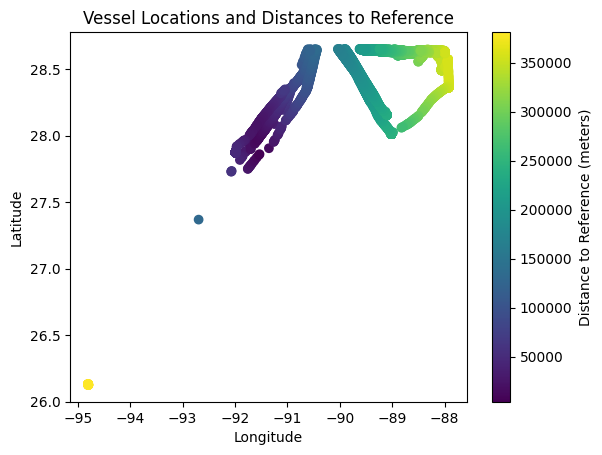

In [28]:
import matplotlib.pyplot as plt
plt.scatter(vessel_data['LON'], vessel_data['LAT'], c=vessel_data['distance_to_reference'], cmap='viridis')
plt.colorbar(label='Distance to Reference (meters)')
plt.title('Vessel Locations and Distances to Reference')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Historical Behaviour

In [29]:
# Example: Calculating average SOG and COG for the same vessel over time
historical_avg_sog = vessel_data['SOG'].mean()
historical_avg_cog = vessel_data['COG'].mean()

vessel_data['sog_anomaly'] = vessel_data['SOG'] > (historical_avg_sog + 2 * vessel_data['SOG'].std())
vessel_data['cog_anomaly'] = vessel_data['COG'].diff().abs() > 30  # Anomaly if change in COG > 30 degrees


C:\Users\revan\AppData\Local\Temp\ipykernel_20660\2571596210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data['sog_anomaly'] = vessel_data['SOG'] > (historical_avg_sog + 2 * vessel_data['SOG'].std())
C:\Users\revan\AppData\Local\Temp\ipykernel_20660\2571596210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data['cog_anomaly'] = vessel_data['COG'].diff().abs() > 30  # Anomaly if change in COG > 30 degrees


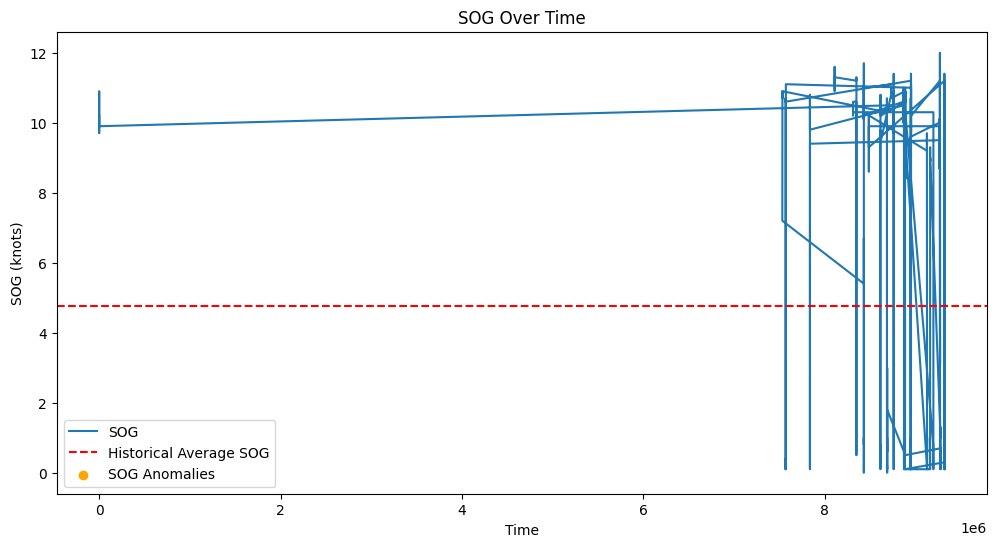

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(vessel_data.index, vessel_data['SOG'], label='SOG')
plt.axhline(historical_avg_sog, color='red', linestyle='--', label='Historical Average SOG')
plt.scatter(vessel_data[vessel_data['sog_anomaly']].index, vessel_data[vessel_data['sog_anomaly']]['SOG'], color='orange', label='SOG Anomalies')
plt.title('SOG Over Time')
plt.xlabel('Time')
plt.ylabel('SOG (knots)')
plt.legend()
plt.show()

C:\Users\revan\AppData\Local\Temp\ipykernel_20660\2396090797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data['hour'] = vessel_data['BaseDateTime'].dt.hour


<Axes: title={'center': 'Average Speed Over Ground by Hour'}, xlabel='hour'>

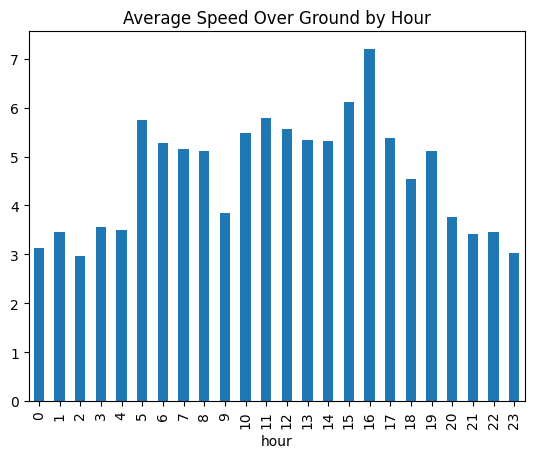

In [33]:
# temporal patterns 
# Extract hour from timestamp
vessel_data['hour'] = vessel_data['BaseDateTime'].dt.hour

# Example: Plot activity by hour
vessel_data.groupby('hour')['SOG'].mean().plot(kind='bar', title='Average Speed Over Ground by Hour')


In [36]:
# Draught changes
# Calculate the change in draught
vessel_data['draught_change'] = vessel_data['Draft'].diff()


C:\Users\revan\AppData\Local\Temp\ipykernel_20660\1942704527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data['draught_change'] = vessel_data['Draft'].diff()


# Visuallising changes

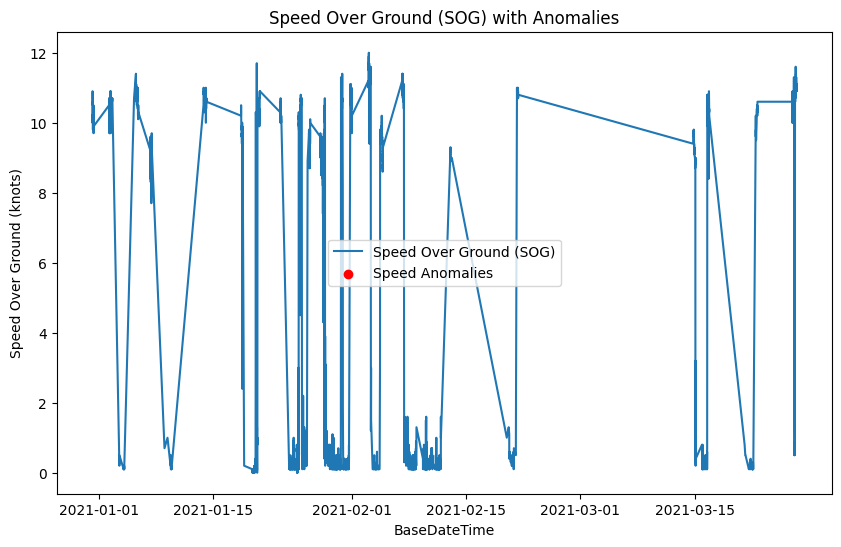

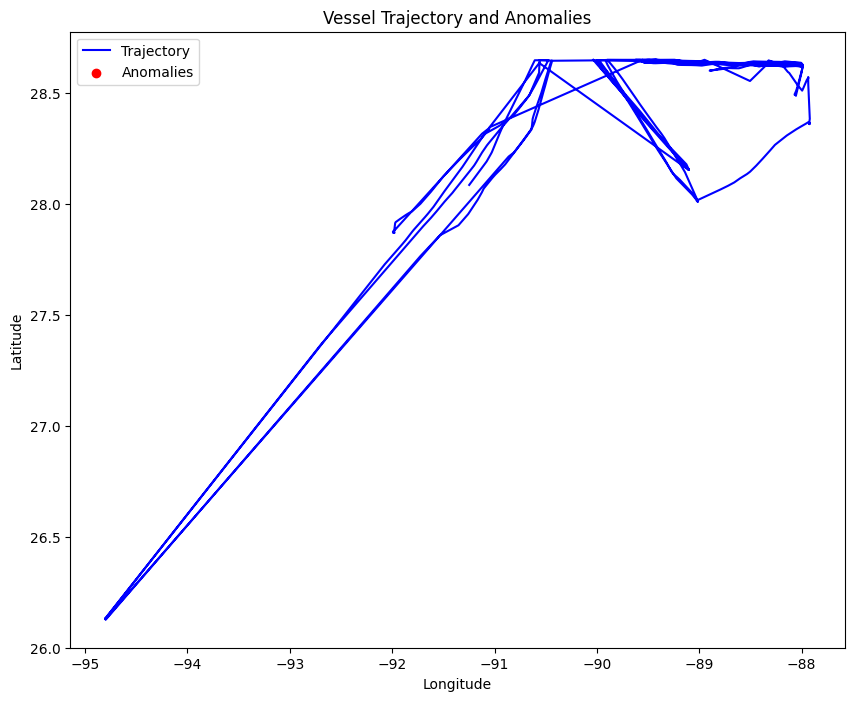

In [37]:
import matplotlib.pyplot as plt

# Plot SOG over time
plt.figure(figsize=(10, 6))
plt.plot(vessel_data['BaseDateTime'], vessel_data['SOG'], label='Speed Over Ground (SOG)')
plt.scatter(vessel_data[vessel_data['sog_anomaly']]['BaseDateTime'],
            vessel_data[vessel_data['sog_anomaly']]['SOG'], color='red', label='Speed Anomalies')
plt.xlabel('BaseDateTime')
plt.ylabel('Speed Over Ground (knots)')
plt.title('Speed Over Ground (SOG) with Anomalies')
plt.legend()
plt.show()

# Plot vessel trajectory
plt.figure(figsize=(10, 8))
plt.plot(vessel_data['LON'], vessel_data['LAT'], label='Trajectory', color='blue')
plt.scatter(vessel_data[vessel_data['movement_pattern'] == -1]['LON'],
            vessel_data[vessel_data['movement_pattern'] == -1]['LAT'], color='red', label='Anomalies')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vessel Trajectory and Anomalies')
plt.legend()
plt.show()


In [39]:
# Save results to a CSV file
vessel_data.to_csv('vessel_data_with_features.csv', index=False)
print("Results have been saved to 'vessel_data_with_features.csv'")

Results have been saved to 'vessel_data_with_features.csv'
